In [65]:
from google.colab import files
import pandas as pd
from Apriori_core import apriori
import os
import sys
import io


uploaded = files.upload()
dataFrame = pd.read_csv(io.StringIO(uploaded['data_new.csv'].decode('utf-8')))


Saving data_new.csv to data_new (4).csv


In [0]:
dataFrame.set_index(' ROLL NO. ',inplace  = True)

In [0]:
subjectList = ['HU101','PH101','M101','ME101','ES101','PH191','ES191','ME192','HU181','XC181']
MAIN_LIST = {}

In [0]:
for rollNo in dataFrame.index:
    arr=[]
    SUBJECTS_WITH_GRADE_D = []
    for subject in subjectList:
        if(dataFrame.loc[rollNo][subject]<7):
            SUBJECTS_WITH_GRADE_D.append(subject)
    if(SUBJECTS_WITH_GRADE_D !=[]):
         MAIN_LIST[rollNo]=SUBJECTS_WITH_GRADE_D

In [71]:
x_axis = []
y_axis = []
AprioriInstance=apriori(min=18,transactions=MAIN_LIST,productlist = subjectList)
for elements in AprioriInstance.finalRules:
    for i in AprioriInstance.finalRules[elements]:
      print(i)
      a,b = i.split(":")
      x_axis.append(a)
      y_axis.append(float(b[1:len(b)-1]))
      

['PH101']=>['ES101']: 95.65217391304348%
['M101']=>['ME101']: 86.66666666666667%
['M101']=>['ES101']: 86.66666666666667%
['XC181']=>['ME101']: 83.33333333333334%
['HU101', 'PH101']=>['ES101']: 96.29629629629629%
['HU101', 'ES101']=>['PH101']: 81.25%
['HU101', 'ME101']=>['ES101']: 81.48148148148148%
['PH101', 'M101']=>['ME101']: 82.6086956521739%
['PH101', 'M101']=>['ES101']: 100.0%
['M101', 'ES101']=>['PH101']: 88.46153846153845%
['PH101', 'ME101']=>['ES101']: 94.28571428571428%
['M101', 'ME101']=>['ES101']: 84.61538461538461%
['M101', 'ES101']=>['ME101']: 84.61538461538461%
['HU101', 'PH101', 'ME101']=>['ES101']: 95.0%
['HU101', 'ME101', 'ES101']=>['PH101']: 86.36363636363636%
['PH101', 'M101']=>['ME101', 'ES101']: 82.6086956521739%
['PH101', 'M101', 'ME101']=>['ES101']: 100.0%
['PH101', 'M101', 'ES101']=>['ME101']: 82.6086956521739%
['M101', 'ME101', 'ES101']=>['PH101']: 86.36363636363636%


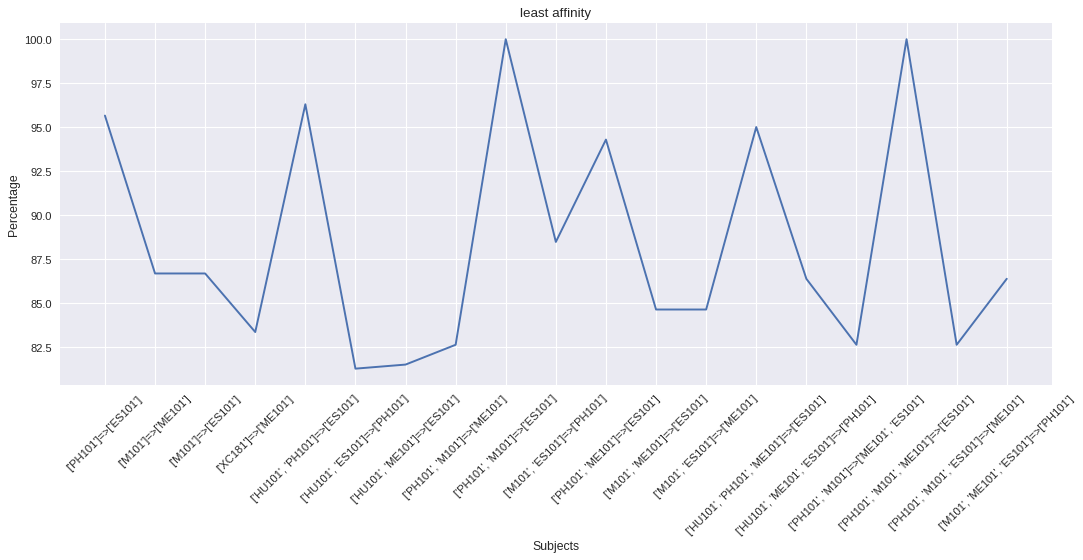

In [0]:
from matplotlib import style
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_axis,y_axis)
plt.title('least affinity')
plt.xlabel('Subjects')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In [0]:
LOWMARKS_LIST = {}
for rollNo in dataFrame.index:
    arr=[]
    SUBJECTS_WITH_GRADE_A = []
    for subject in subjectList:
        if(dataFrame.loc[rollNo][subject]>8):
            SUBJECTS_WITH_GRADE_A.append(subject)
    if(SUBJECTS_WITH_GRADE_A !=[]):
         LOWMARKS_LIST[rollNo]=SUBJECTS_WITH_GRADE_A

x_axis_2 = []
y_axis_2 = []
AprioriInstance=apriori(min=18,transactions=LOWMARKS_LIST,productlist = subjectList)
for elements in AprioriInstance.finalRules:
    for i in AprioriInstance.finalRules[elements]:
      print(i)
      a,b = i.split(":")
      x_axis_2.append(a)
      y_axis_2.append(float(b[1:len(b)-1]))

['M101']=>['ES191']: 87.5%
['PH191']=>['ES191']: 86.66666666666667%
['PH191']=>['HU181']: 86.66666666666667%
['ME192']=>['ES191']: 86.79245283018868%
['XC181']=>['ES191']: 83.6734693877551%
['PH191', 'ME192']=>['ES191']: 82.6086956521739%
['PH191', 'ES191']=>['HU181']: 88.46153846153845%
['PH191', 'HU181']=>['ES191']: 88.46153846153845%
['PH191', 'XC181']=>['ES191']: 95.23809523809523%
['PH191', 'ME192']=>['HU181']: 86.95652173913044%
['PH191', 'XC181']=>['HU181']: 90.47619047619048%
['ME192', 'HU181']=>['ES191']: 84.61538461538461%
['ME192', 'XC181']=>['ES191']: 92.5925925925926%
['HU181', 'XC181']=>['ES191']: 84.21052631578947%
['ME192', 'XC181']=>['HU181']: 88.88888888888889%
['PH191', 'XC181']=>['ES191', 'HU181']: 85.71428571428571%
['PH191', 'ES191', 'XC181']=>['HU181']: 90.0%
['PH191', 'HU181', 'XC181']=>['ES191']: 94.73684210526315%
['ME192', 'XC181']=>['ES191', 'HU181']: 81.48148148148148%
['ES191', 'ME192', 'XC181']=>['HU181']: 88.0%
['ME192', 'HU181', 'XC181']=>['ES191']: 91.

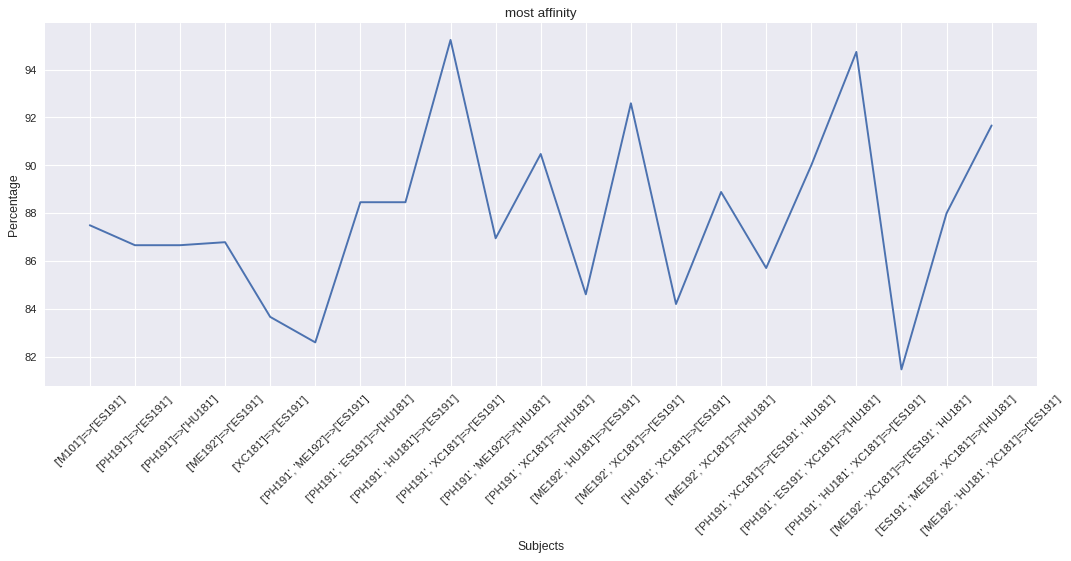

In [0]:
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x_axis_2,y_axis_2)
plt.title('most affinity')
plt.xlabel('Subjects')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()